# Lagrange finite element space

In this activity, we become familiar with a computational object that can represent elements of the simplest finite element space, called the Lagrange finite element space. These are vector spaces of funtions on a spatial domain. We start from the case of a one-dimensional domain and proceed to  higher dimensions.

## 1D: Lowest order one-dimensional case 


Partition the interval $[0, 1]$ using a uniform mesh $\{ x_i = i h: i=0, \ldots, N \}$ of $N+1$ points, where the mesh size is $h = 1/N$ and set  
$$
V_{h, 1} = \{ v: \; v \text{ is continuous and }
v|_{[x_i, x_{i+1}]} \text { is linear }\}.
$$
This vector space is called the **lowest order Lagrange finite element space** in the one-dimensional domain $[0,1]$. To work with funtions in this space, we first make the mesh.

In [1]:
import ngsolve as ng
from ngsolve.meshes import Make1DMesh

In [2]:
N = 5   # the number of mesh elements
mesh = Make1DMesh(5)

An ngsolve mesh object can be queried in many ways - type `help(mesh)` for the documentation. For example, you can double check it has the points you intended to set as the grid points:

In [16]:
for x in mesh.vertices:
    print(x.point)

(0.0,)
(0.2,)
(0.4,)
(0.6,)
(0.8,)
(1.0,)


The next steps use functionalities that are common for any finite element space (be it in 1D, 2D, or 3D) implemented in NGSolve.   Here is the NGSolve representation of the space $V_{h1}$ we introduced above.

In [3]:
Vh1 = ng.H1(mesh)

The syntax `H1` comes from the fact that Lagrange finite elements are used to approximate weak formulations in the Sobolev space $H^1$. (More about that later.)  Functions in this space are represented in ngsolve by  `GridFunction` objects. Let us see how a function in this space looks like.

In [4]:
v = ng.GridFunction(Vh1, 'myfun')

This is now an uninitialized function in $V_{h1}$. We can set the values of `v` in various ways. One way is to interpolate a known function. 

#### Interpolation 

In ngsolve  interpolation into a finite element space is accomplished using the `Set` method.  To declare functions in terms of coordinates (just $x$ in 1D, $x, y, z$ in 3D etc), these coordinates are available as NGSolve `CoefficientFunction` objects. Let us import `x` to make up a function of $x$ and interpolate it into $V_{h1}$:

In [5]:
from ngsolve import x     

v.Set(x * x)

The `GridFunction` object `v` now has the interpolant of the function $f(x) = x^2$ into the piecewise linear space $V_{h1}$. 
To visualize `v`, we may use the common `matplotlib` python module as follows.

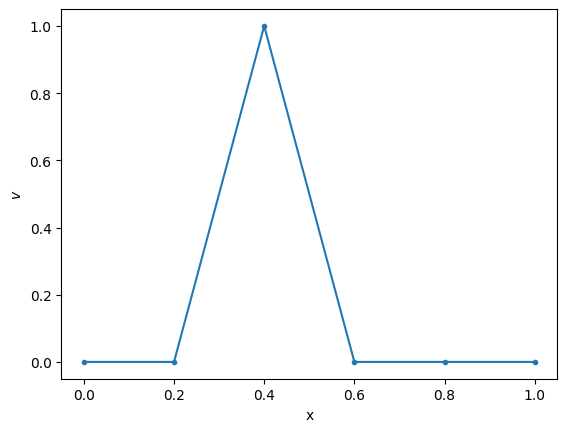

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plotv(v=v, sty='.-'):
    pts = [vtx.point[0] for vtx in mesh.vertices]
    plt.plot(pts, np.array(v.vec), sty)
    plt.xlabel('x'); plt.ylabel('$v$');

plotv()

Clearly, this is the expected continuous **piecewise linear approximation** of $x^2$ from the FE space $V_{h1}$.

#### Basis expansion

The functions $\psi_i \in V_{h1}$ with the property 
$$
\psi_i(x_j) = \delta_{ij}
$$
at every mesh point $x_j$ are often called **hat functions**. Here $\delta_{ij}$ denotes the Kronecker delta (equals 1 if $i=j$ and 0 otherwise). Although the above only gives the values of $\psi_i$ at the mesh vertices $x_j$, that is enough to determine the function $\psi_i$ everywhere since it is linear in between the mesh points. Here is a visualization of one of these hat functions (obtained by setting them in `v`'s memory).

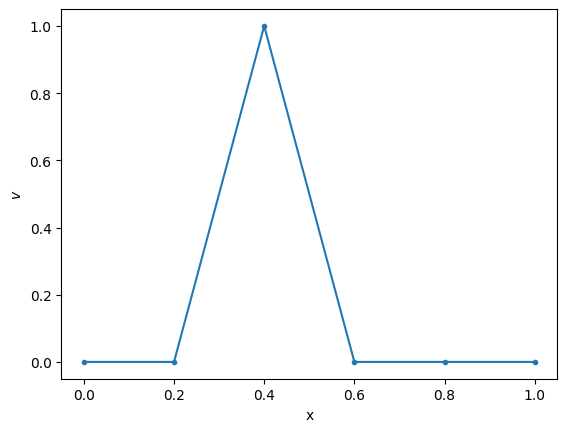

In [8]:
i = N//2
v.vec[:] = 0
v.vec[i] = 1
plotv()

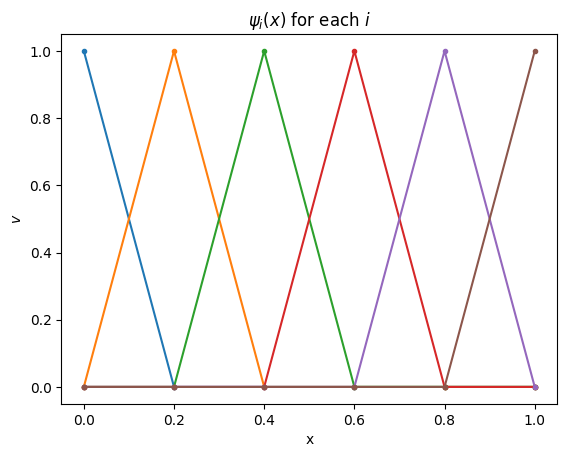

In [9]:
for i in range(N+1):
    v.vec[:] = 0
    v.vec[i] = 1
    plotv()
plt.title('$\psi_i(x)$ for each $i$');

#### Exercise 1  

Consider the lowest order Lagrange finite element space $V_h$ built on a one-dimensional mesh $x_0 < x_1 < \cdots < x_N$ of the interval $[x_0, x_N]$. Let  $\psi_i \in V_h$ satisfy
$
\psi_i(x_j) = \delta_{ij}
$
at every mesh point $x_j$.
Prove that the $\{\psi_i:  i=0, \ldots, N\}$ is a basis for the space $V_h$.


In fact, when  `v` is expressed in term of finite element basis of hat functions $\{\psi_i\}$, 
$$
v(x) = \sum_{i=0}^N v_i \psi_i(x)
$$
the vector of coefficients $v_i$ in this basis expansion
gives all information contained in `v`. This is the vector we have been accessing using `v.vec`.